# Plotting data with pandas

pandas has built-in methods that simplify the creation of data visualization from DataFrames and Series objetcs.
This part of the course covers the main pandas possibilities for plotting data.

Before start coding, let's import the pandas library as usual, and the numpy, for some numerical processing we may need:

In [1]:
import pandas as pd
import numpy as np

Finally, in order to better visualize the plots in this notebook, we execute the following line:

In [2]:
%matplotlib inline

## Available plots

Here we present a showcase of the main types of plots available in pandas, using artificial data generated by common numpay functions. Examples
with a real dataset come in the next section.

### Line plots

All DataFrame and Series objects are equipped with the *plot* method, which builds some basic plots.
The default is line plots. Check how we can create a line plot from a Series object:

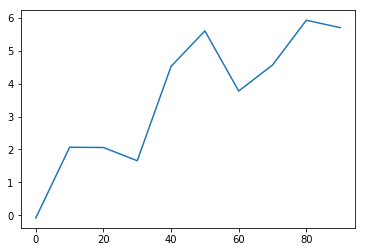

In [3]:
# Create a Series object
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
# Call its plot method
s.plot()

Notice that the index of the Series object was used on the x-axis. We can disable this feature by passing *use_index=False* to the *plot* method. Other configuration parameters are:
- xticks
- xlim
- yticks
- ylim
- ax

We can also use DataFrames for the same purpose. In this case, each column will produce a line plot on the same
subplot, and a legend will be automatically created:

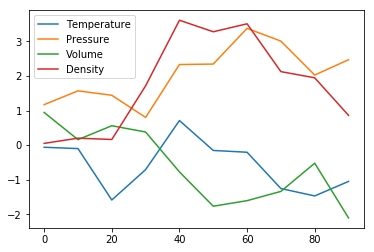

In [4]:
# Create a DataFrame object
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['Temperature','Pressure','Volume','Density'],
                 index=np.arange(0,100,10))
# Call its plot method
df.plot()

### Bar plots

For Series and DataFrames, *plot* can also be seen as an attribute with a family of methods, each of them representing
a kind of plot. For example, the same effects of the previous call to the *plot* method could be achieved by
calling *plot.line()*. Following this model, bar plots can be produced by calling *plot.bar()* (vertical bars) or
*plot.barh()* (horizontal bars):

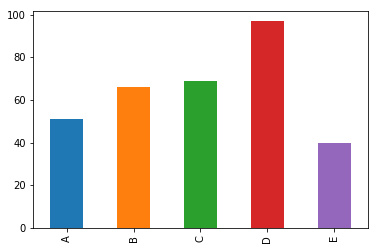

In [43]:
# Create a Series object
s = pd.Series(np.random.randint(30,100,5), index=['A','B','C','D','E'])
# Plot vertical bars, respectively, using its plot attribute
s.plot.bar()

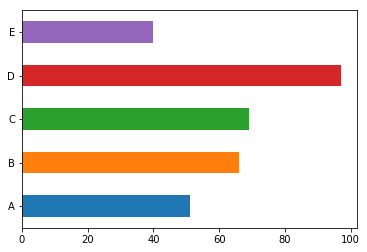

In [44]:
# Plot horizontal bars
s.plot.barh()

Plotting bars from DataFrames produces groups of bars for each row. Each bar in a group 
represents a column (or a cell) in the corresponding row:

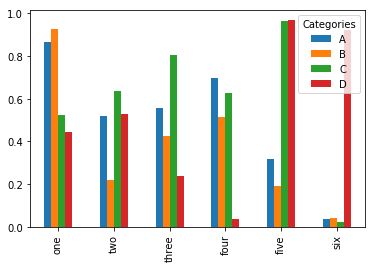

In [7]:
# Create a DataFrame
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],name='Categories'))
# Plot using in plot attribute
df.plot.bar()

We can avoid the creation of such groups by passing the *stacked=True* argument:

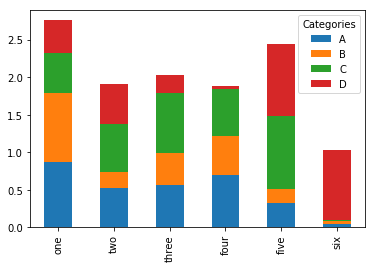

In [8]:
df.plot.bar(stacked=True)

### Pie plots

Generating a pie plot with pandas is just about using the *plot.pie()* method:

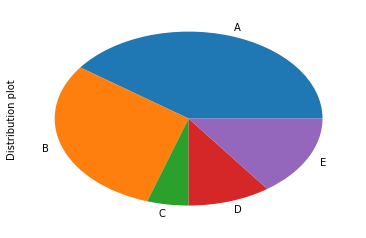

In [9]:
# Create a Series object
s = pd.Series([40,30,5,10,15], index=['A','B','C','D','E'], name='Distribution plot')
# Create the pie plot
s.plot.pie()

### Box plots

Given a sequence of values in a Series object, the box plot can be generated using the *plot.box()* method:

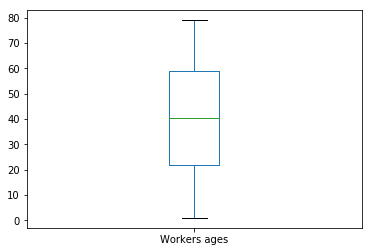

In [10]:
# Generating a sequence of values in a Series object
s = pd.Series(np.random.randint(0, 80, size=100), name="Workers ages")
# Create the box plot
s.plot.box()

### Area plots

Area plots are useful to compare two or more variables whose values change over some fixed interval. We 
can use DataFrames to represent such variables and, then, produce the area plot:

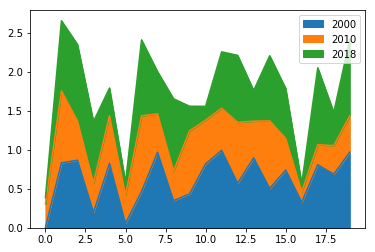

In [11]:
# Create the DataFrame
df = pd.DataFrame(np.random.rand(20,3), columns=['2000','2010','2018'])
# Generate the area graph
df.plot.area()

### Scatter plots

Scatter plots allows to visualize the distribution of a set of points in a plane:

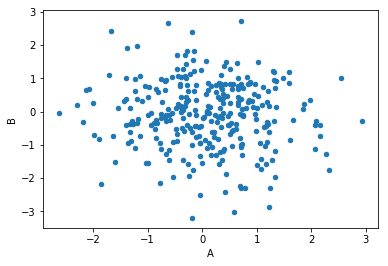

In [12]:
# Produce the set of points
df = pd.DataFrame(np.random.randn(300, 2), columns=['A','B'])
# Create a scatter plot
df.plot.scatter(x='A', y='B')

We can also create groups of points, using one color for each one:

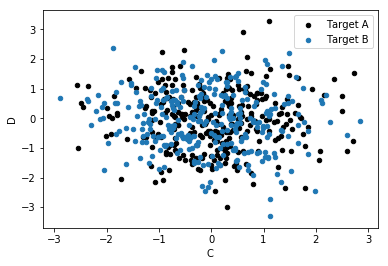

In [13]:
# Produce the set of points
df = pd.DataFrame(np.random.randn(300, 4), columns=['A','B','C','D'])
# Keep the first plot
ax = df.plot.scatter(x='A', y='B', label='Target A', color='k')
# Use the previous plot to plot the other group
df.plot.scatter(x='C', y='D', label='Target B', ax = ax)

### Hexagonal bin plots

When there are too many data points, a scatter plot may become polluted. Hexagonal bin plots
come to simplify the visualization in such cases:

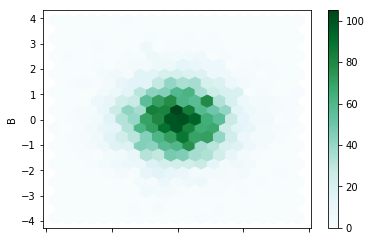

In [14]:
# Produce the set of points
df = pd.DataFrame(np.random.randn(5000, 2), columns=['A','B'])
# Create a scatter plot
df.plot.hexbin(x='A', y='B', gridsize=20)

### Histograms and density plots

We can visualize the frequence of the values using histograms and density plots:

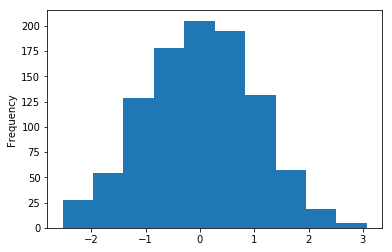

In [15]:
# Create values
s = pd.Series(np.random.randn(1000))
# Produce a histogram
s.plot.hist()

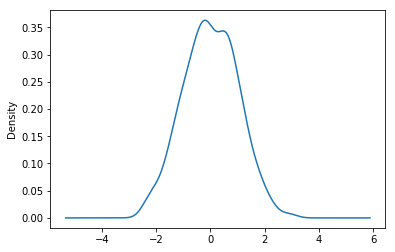

In [16]:
# Produce a density plot
s.plot.kde()

## Example: The Power Plant Dataset

In this section, we present plots generated with data from the [Global Power Plant Database](https://github.com/wri/global-power-plant-database). This open-source database aggregate data about power plants around the world,
providing information like general plant characterization, fuel type, power generation statistics and geographical location (latitude and longitude).
So, let's check some plots about the power plants and see what we can grasp.

### Loading the dataset

First of all, let's use pandas to load the dataset and check some rows:

In [46]:
# Use pandas to load the dataset into a DataFrame
gpp_database = pd.read_csv("../datasets/global_power_plant_database.csv")
# Print the first lines
gpp_database.head()
gpp_database.loc[gpp_database['country'] == 'BRA'].shape

(2340, 22)

### Check the Top 10 countries considering the number of power plants

First, we group the rows by the `country` column values, then sort and take the first 10
rows. The result is plotted using the `bar` function.

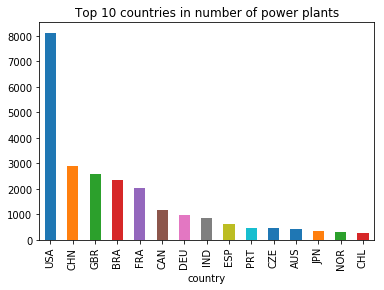

In [18]:
# Obtain the GroupBy object
group_by_country = gpp_database.groupby(['country'])
# Aggregate by the size of each group, sort and take the TOP 10
plants_per_country_dataset = group_by_country.size().sort_values(ascending=False).head(15)
# Plot in a bar plot
plants_per_country_dataset.plot.bar(title="Top 10 countries in number of power plants")

### Check the Top 10 countries considering popular fuel types and number of power plants

Here, we can create a pivot table to count the number of power plants considering countries and fuel types.

In [49]:
# Select only the country and fuel columns in a DataFrame
country_fuel_ds = gpp_database[['fuel1', 'country']]
# Create a pivot table with counting
pivot_table_country_fuel = pd.pivot_table(country_fuel_ds, index=['fuel1'], 
                                          columns=['country'], 
                                          aggfunc = len, fill_value = 0)
# Popular fuel types to consider
popular_fuel_types = ['Hydro','Wind','Oil','Gas','Solar','Nuclear']
# Select some fuel types
pivot_table_country_fuel = pivot_table_country_fuel.loc[popular_fuel_types]

Let's make a Top 10 of countries for each row of the `pivot_table_country_fuel` table, and use subplots to plot one graphic per fuel type:

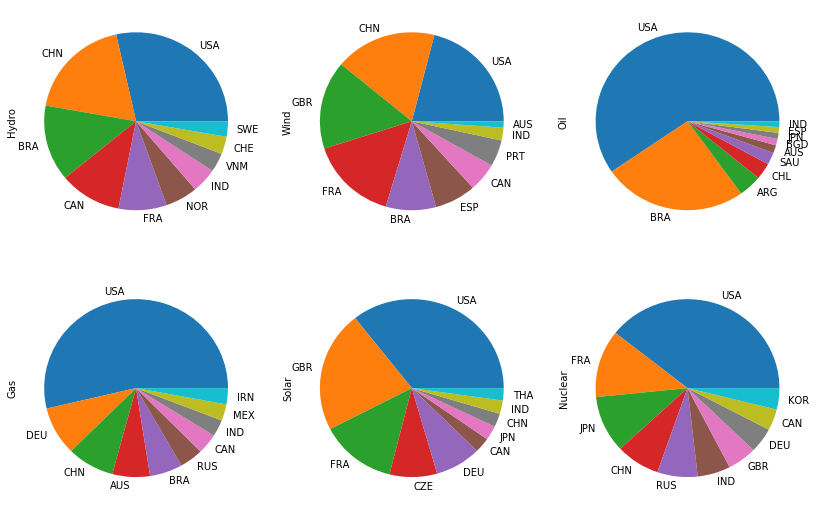

In [50]:
# We need pyplot for subplots
import matplotlib.pyplot as plt
# Create six subplots
f, axes = plt.subplots(2, 3, figsize=(14,9))
# Transform the popular_fuel_types into a 2x3 matrix, to facilitate the next step
popular_fuel_types = np.reshape(popular_fuel_types, (2, 3))
# Take all possible coordinates in the 2x3 matrix of graphs
graph_coordinates = [(x,y) for x in [0,1] for y in [0,1,2]]
# Plot in each subfigure the graph for each fuel type
for x, y in graph_coordinates:
    pivot_table_country_fuel.loc[popular_fuel_types[x,y]].sort_values(ascending=False).head(10).plot.pie(ax=axes[x,y])

### Histogram for USA oil power plants' capacities

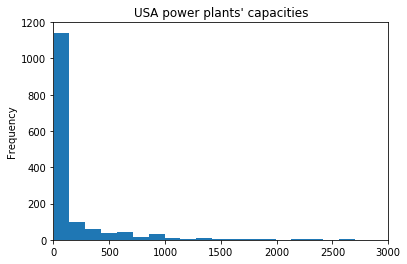

In [47]:
# Take only the USA oil power plants capacities
usa_oil_plants = gpp_database.loc[(gpp_database['country'] == 'USA') & (gpp_database['fuel1'] == 'Oil')]['capacity_mw']
# Plot histogram
usa_oil_plants.plot.hist(bins=30, xlim=(0,3000), title="USA power plants' capacities")

### Box plot for USA power plants' capacities

In the histogram, we can see a high concentration in very low capacities and some outliers with higher values. A box plot highlight this behaviour:

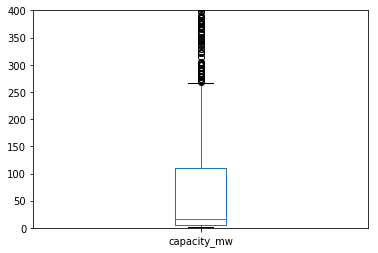

In [48]:
# Use the same DataFrame, but plotting a box plot, limiting the y values to better see the box
usa_oil_plants.plot.box(ylim=(0,400))